In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# helper function to plot curves
def make_plot(x_values, y_values, x_label, y_label, title):
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(x_values, y_values)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [4]:
random_state = 2020

## Load and prepare dataset

In [5]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')

df_white['type'] = ['white'] * len(df_white)
df_red['type'] = ['red'] * len(df_red)

df = pd.concat([df_white, df_red])

X = df.drop(['quality', 'type'], axis=1) 
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2020) 

# In data_exploration we see almost all features have a normal distribution 
# So it makes sense to use StandardScaler
scaler = StandardScaler()
encoder = LabelEncoder() 

# Apply the scaler on train and test data separately
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
y_train = encoder.fit_transform(y_train)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns) 
y_test = encoder.fit_transform(y_test)

# Part 1: Clustering

## K-means clustering

In [6]:
%%time
sse = []
silhouettes = []
k_range = range(2,len(X_train.columns)+1)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train, kmeans.labels_, random_state=random_state))

CPU times: user 10.1 s, sys: 1.6 s, total: 11.7 s
Wall time: 7.86 s


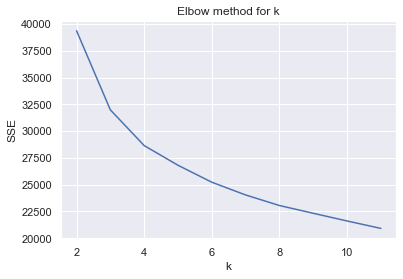

In [7]:
make_plot(x_values=k_range, 
          y_values=sse, 
          x_label='k', 
          y_label='SSE',
          title='Elbow method for k')

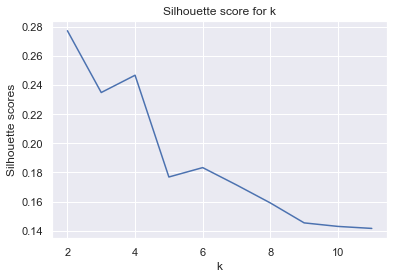

In [8]:
make_plot(x_values=k_range, 
          y_values=silhouettes, 
          x_label='k', 
          y_label='Silhouette scores',
          title='Silhouette score for k')

In [9]:
# modified code from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

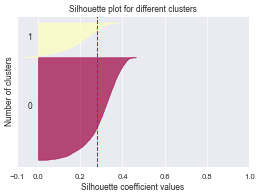

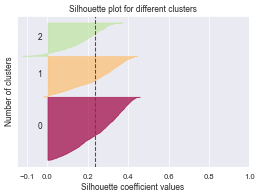

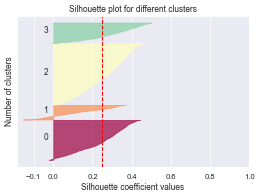

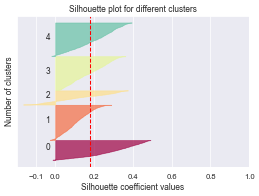

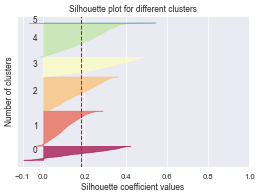

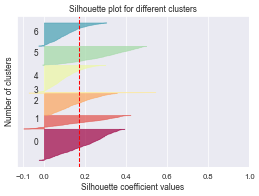

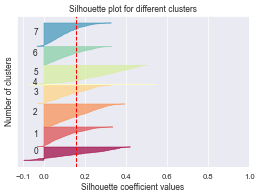

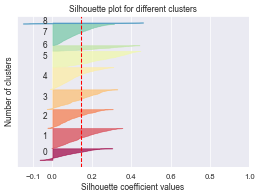

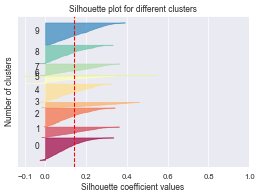

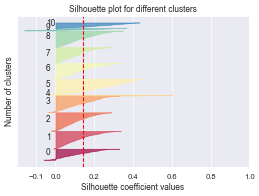

In [10]:
for k in k_range:
    plt.figure(dpi=50)
    ax1 = plt.gca()
    
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train, labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, labels)
    
    y_lower = 100
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("Silhouette plot for different clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Number of clusters")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [11]:
kmeans_2, kmeans_3, kmeans_4 = [KMeans(n_clusters=n, random_state=random_state) for n in [2,3,4]]
kmeans_2.fit(X_train)
kmeans_3.fit(X_train)
kmeans_4.fit(X_train)            
labels_2, labels_3, labels_4 = kmeans_2.labels_, kmeans_3.labels_, kmeans_4.labels_

In [12]:
df_2 = pd.DataFrame(labels_2, columns={'labels'})
df_3 = pd.DataFrame(labels_3, columns={'labels'})
df_4 = pd.DataFrame(labels_4, columns={'labels'})

In [13]:
df_2.groupby('labels')['labels'].count() / len(df_2)

labels
0    0.748625
1    0.251375
Name: labels, dtype: float64

In [14]:
df_3.groupby('labels')['labels'].count() / len(df_3)

labels
0    0.460963
1    0.295580
2    0.243457
Name: labels, dtype: float64

In [15]:
df_4.groupby('labels')['labels'].count() / len(df_4)

labels
0    0.292940
1    0.107104
2    0.448208
3    0.151748
Name: labels, dtype: float64

In [16]:
df['type'].value_counts()/len(df)

white    0.753886
red      0.246114
Name: type, dtype: float64

## Expectation Maximization

In [17]:
%%time
n_components_values = range(2, len(X_train.columns)+1)
bic_values = []
aic_values = []
silhouettes = []

for n_components in n_components_values:
    gmm = GaussianMixture(n_components=n_components, 
                          random_state=random_state)
    gmm.fit(X_train)
    bic_values.append(gmm.bic(X_train))
    aic_values.append(gmm.aic(X_train))
    silhouettes.append(silhouette_score(X_train, gmm.predict(X_train), random_state=random_state))

CPU times: user 11.2 s, sys: 1.38 s, total: 12.6 s
Wall time: 6.54 s


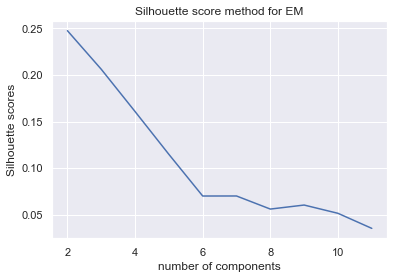

In [18]:
make_plot(x_values=n_components_values, 
          y_values=silhouettes, 
          x_label='number of components', 
          y_label='Silhouette scores',
          title='Silhouette score method for EM')

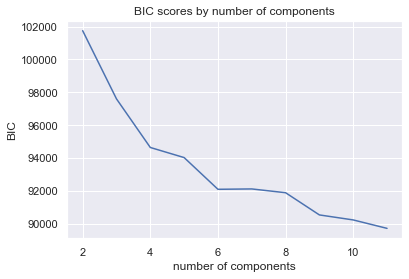

In [19]:
make_plot(x_values=n_components_values, 
          y_values=bic_values, 
          x_label='number of components', 
          y_label='BIC',
          title='BIC scores by number of components')

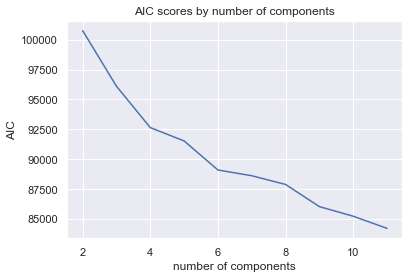

In [20]:
make_plot(x_values=n_components_values, 
          y_values=aic_values, 
          x_label='number of components', 
          y_label='AIC',
          title='AIC scores by number of components')

In [21]:
bic_values.index(min(bic_values))+2

11

In [22]:
len(X_train.columns)

11

In [23]:
aic_values.index(min(aic_values))+2

11

# Part 2: Dimensionality Reduction

## PCA

In [24]:
pca = PCA(random_state=random_state)
features = pca.fit_transform(X_train)
pca.fit(X_train)

PCA(random_state=2020)

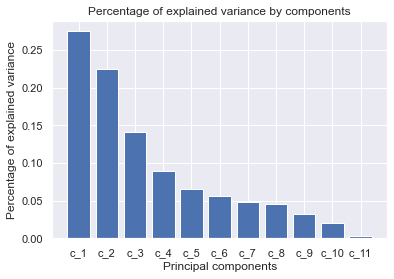

In [25]:
explained_variance = pca.explained_variance_ratio_
labels = ['c_' + str(x) for x in range(1,len(explained_variance)+1)]
plt.bar(x=list(range(1,len(explained_variance)+1)), height=explained_variance, tick_label=labels)
plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variance')
plt.title('Percentage of explained variance by components');

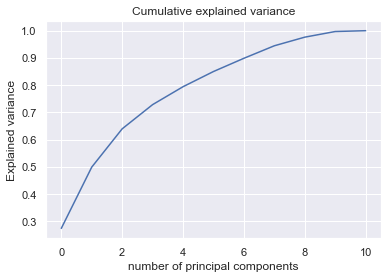

In [26]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
make_plot(x_values=list(range(len(cumulative_variance))), 
          y_values=cumulative_variance, 
          x_label='number of principal components', 
          y_label='Explained variance',
          title='Cumulative explained variance')

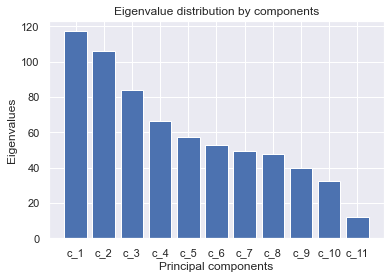

In [27]:
eigenvalues = pca.singular_values_
labels = ['c_' + str(x) for x in range(1,len(eigenvalues)+1)]
plt.bar(x=list(range(1,len(eigenvalues)+1)), height=eigenvalues, tick_label=labels)
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalue distribution by components');

In [28]:
pca = PCA(n_components=3, random_state=random_state)
features = pca.fit_transform(X_train)
c1_var, c2_var, c3_var = pca.explained_variance_ratio_

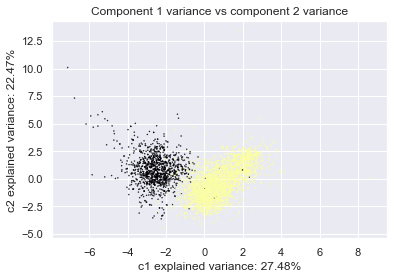

In [29]:
ax = plt.figure().gca(title='Component 1 variance vs component 2 variance', 
                                   xlabel='c1 explained variance: {}%'.format(round(c1_var*100, 2)), 
                                   ylabel='c2 explained variance: {}%'.format(round(c2_var*100, 2))
                                  )
ax.scatter(features[:, 0], features[:, 1], c=y_train, s=0.2, cmap = 'inferno');

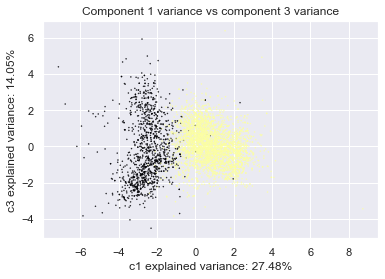

In [30]:
ax = plt.figure().gca(title='Component 1 variance vs component 3 variance', 
                                   xlabel='c1 explained variance: {}%'.format(round(c1_var*100, 2)), 
                                   ylabel='c3 explained variance: {}%'.format(round(c3_var*100, 2))
                                  )
ax.scatter(features[:, 0], features[:, 2], c=y_train, s=0.2, cmap = 'inferno');

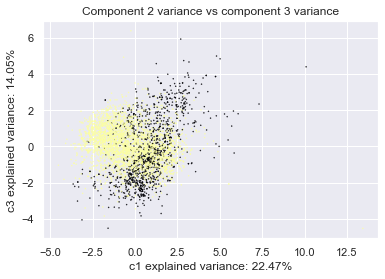

In [31]:
ax = plt.figure().gca(title='Component 2 variance vs component 3 variance', 
                                   xlabel='c1 explained variance: {}%'.format(round(c2_var*100, 2)), 
                                   ylabel='c3 explained variance: {}%'.format(round(c3_var*100, 2))
                                  )
ax.scatter(features[:, 1], features[:, 2], c=y_train, s=0.2, cmap = 'inferno');

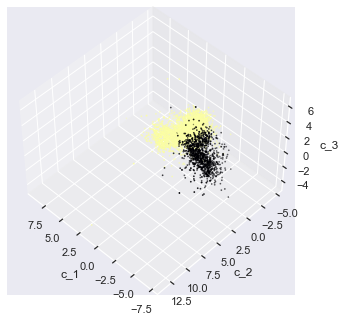

In [32]:
fig = plt.figure(figsize=(5,4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('c_1')
ax.set_ylabel('c_2')
ax.set_zlabel('c_3')

ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=y_train, cmap = 'inferno', s=0.6);

## ICA

In [33]:
ica = FastICA(random_state=random_state, whiten=True)
S_ = ica.fit_transform(X_train)

In [34]:
kurtosis_values = []
n_components_values = range(2,len(X_train.columns)+1)

for n_components in n_components_values:
    ica = FastICA(n_components=n_components, 
                  random_state=random_state)
    S_ = ica.fit_transform(X_train)
    kurtosis_df = pd.DataFrame(S_)
    kurtosis_df = kurtosis_df.kurt(axis=0)
    kurtosis_values.append(kurtosis_df.abs().mean())

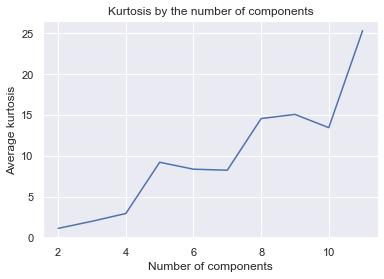

In [35]:
make_plot(x_values=list(n_components_values), 
          y_values=kurtosis_values, 
          x_label='Number of components', 
          y_label='Average kurtosis',
          title='Kurtosis by the number of components')

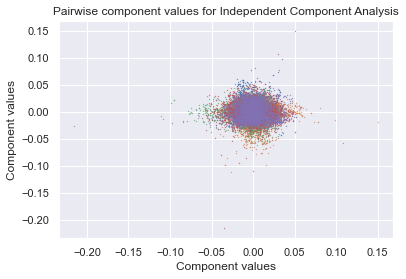

In [36]:
n_components=5

ica = FastICA(random_state=random_state, whiten=True)
ica_data = ica.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Independent Component Analysis')
for n in range(n_components):
    plt.scatter(ica_data[:,n], ica_data[:,(n+1)%n_components], s=0.1)

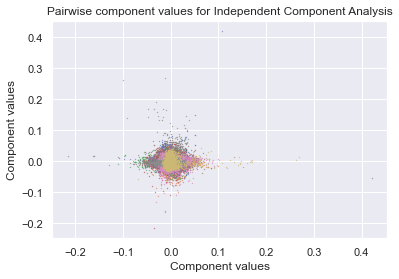

In [37]:
n_components=9

ica = FastICA(random_state=random_state, whiten=True)
ica_data = ica.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Independent Component Analysis')
for n in range(n_components):
    plt.scatter(ica_data[:,n], ica_data[:,(n+1)%n_components], s=0.1)

## Randomized Projection

In [38]:
error_values = []
n_components_values = range(2,len(X_train.columns)+1)

for n_components in n_components_values:
    rp = GaussianRandomProjection(n_components=n_components, 
                                  random_state=random_state)
    X_transformed = rp.fit_transform(X_train)
    psuedoinverse = np.linalg.pinv(rp.components_.T)
    reconstructed = X_transformed.dot(psuedoinverse)
    error = mean_squared_error(X_train, reconstructed)
    error_values.append(error)

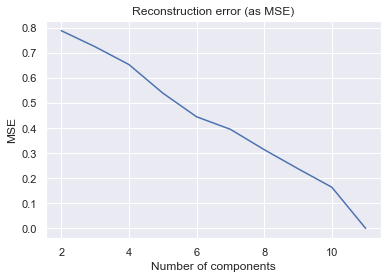

In [39]:
make_plot(x_values=list(n_components_values), 
          y_values=error_values, 
          x_label='Number of components', 
          y_label='MSE',
          title='Reconstruction error (as MSE)')

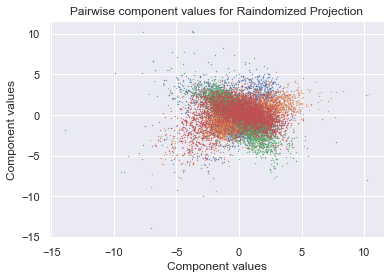

In [40]:
n_components = 4

rp = GaussianRandomProjection(n_components=n_components, 
                              random_state=random_state)
rp_data = rp.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Raindomized Projection')
for n in range(n_components):
    plt.scatter(rp_data[:,n], rp_data[:,(n+1)%n_components], s=0.1)

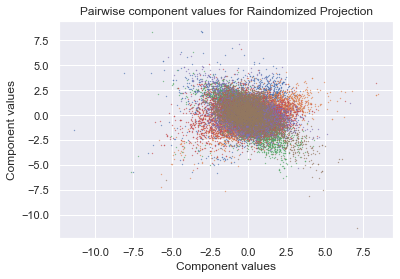

In [41]:
n_components = 6

rp = GaussianRandomProjection(n_components=n_components, 
                              random_state=random_state)
rp_data = rp.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Raindomized Projection')
for n in range(n_components):
    plt.scatter(rp_data[:,n], rp_data[:,(n+1)%n_components], s=0.1)

#### Try different random states

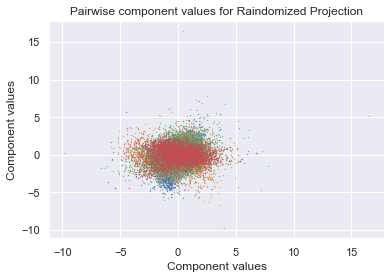

In [42]:
n_components = 4

rp = GaussianRandomProjection(n_components=n_components, 
                              random_state=1791)
rp_data = rp.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Raindomized Projection')
for n in range(n_components):
    plt.scatter(rp_data[:,n], rp_data[:,(n+1)%n_components], s=0.1)

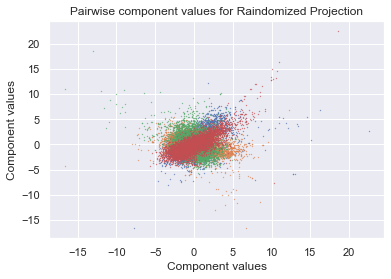

In [43]:
n_components = 4

rp = GaussianRandomProjection(n_components=n_components, 
                              random_state=1453)
rp_data = rp.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Raindomized Projection')
for n in range(n_components):
    plt.scatter(rp_data[:,n], rp_data[:,(n+1)%n_components], s=0.1)

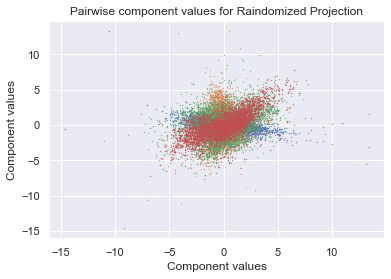

In [44]:
n_components = 4

rp = GaussianRandomProjection(n_components=n_components, 
                              random_state=9000)
rp_data = rp.fit_transform(X_train)

plt.figure()
plt.xlabel('Component values')
plt.ylabel('Component values')
plt.title('Pairwise component values for Raindomized Projection')
for n in range(n_components):
    plt.scatter(rp_data[:,n], rp_data[:,(n+1)%n_components], s=0.1)

## Select from Model

In [45]:
# from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [46]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)

In [47]:
selector.estimator_.coef_

array([[-0.32366632, -1.26539049,  0.19533505,  3.37610229, -0.81412063,
        -0.88273001,  2.96309339, -3.40975902, -0.35423133, -0.68262179,
        -1.25573811]])

In [48]:
selector.threshold_

1.411162585271161

In [49]:
selector.get_support()

array([False, False, False,  True, False, False,  True,  True, False,
       False, False])

In [50]:
selector.transform(X_train)

array([[ 1.86754661,  1.17128376,  1.09696824],
       [-0.2005002 ,  0.53865627, -0.86080479],
       [ 1.7630998 ,  0.31020745,  0.06830783],
       ...,
       [ 0.46795937, -0.33999303, -1.1129925 ],
       [-0.53472999,  0.09933162, -1.80319045],
       [ 0.21728703,  0.81982405, -0.32988329]])

In [51]:
print(X_train.columns[3], ',', X_train.columns[6], ',', X_train.columns[7])

residual sugar , total sulfur dioxide , density


# Part 3: Clustering on Adjusted Data Space

## Create Adjusted Data Space

In [52]:
pca = PCA(n_components=3, random_state=random_state)
pca_features = pca.fit_transform(X_train)

In [53]:
ica = FastICA(n_components=5, random_state=random_state, whiten=True)
ica_features = ica.fit_transform(X_train)

In [54]:
rp = GaussianRandomProjection(n_components=6, 
                              random_state=random_state)
rp_features = rp.fit_transform(X_train)

In [55]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)
selector_features = selector.transform(X_train)

## Clustering on Adjusted Data Space

## K-means clustering

In [56]:
def k_means_report(X_train):
    sse = []
    silhouettes = []
    k_range = range(2,len(X_train.columns)+1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(X_train)
        sse.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X_train, kmeans.labels_, random_state=random_state))
        
    make_plot(x_values=k_range, 
          y_values=sse, 
          x_label='k', 
          y_label='SSE',
          title='Elbow method for k')
    
    make_plot(x_values=k_range, 
          y_values=silhouettes, 
          x_label='k', 
          y_label='Silhouette scores',
          title='Silhouette score for k')
    
    for k in k_range:
        plt.figure(dpi=50)
        ax1 = plt.gca()

        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(X_train)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_train, labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_train, labels)

        y_lower = 100
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmap = cm.get_cmap("Spectral")
            color = cmap(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette plot for different clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Number of clusters")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

CPU times: user 4.09 s, sys: 663 ms, total: 4.75 s
Wall time: 2.83 s


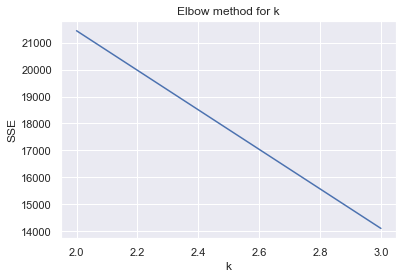

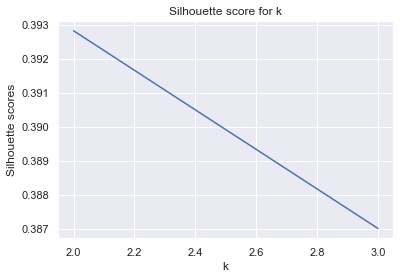

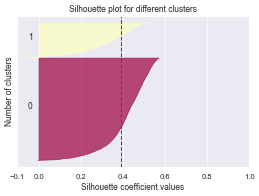

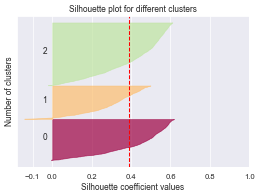

In [57]:
%%time
k_means_report(pd.DataFrame(pca_features))

CPU times: user 10.1 s, sys: 1.62 s, total: 11.7 s
Wall time: 5.23 s


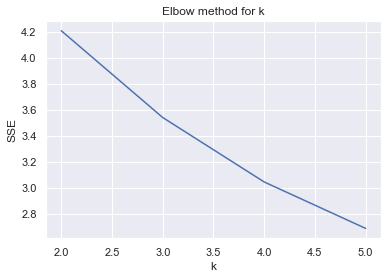

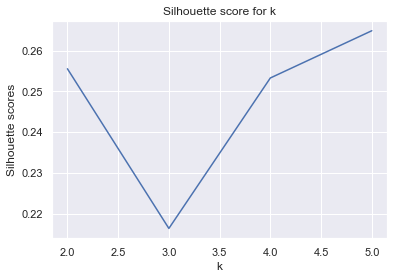

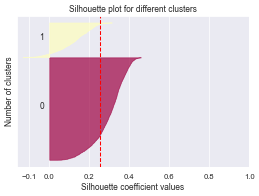

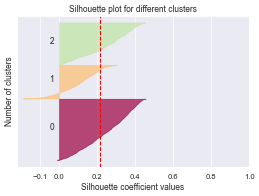

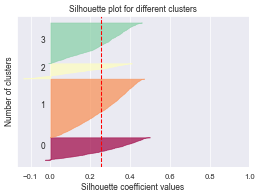

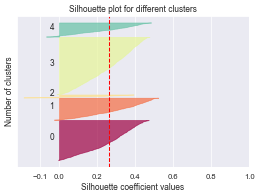

In [58]:
%%time
k_means_report(pd.DataFrame(ica_features))

CPU times: user 13.2 s, sys: 2.1 s, total: 15.3 s
Wall time: 6.96 s


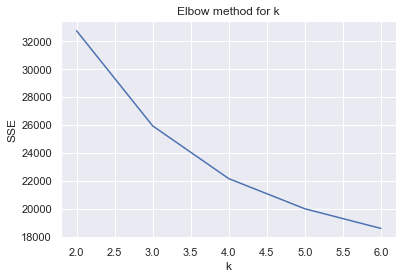

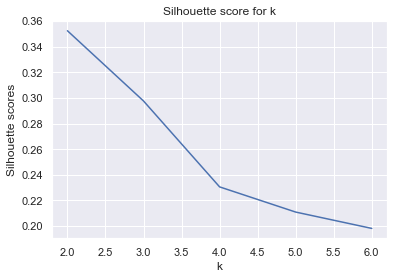

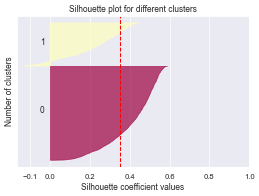

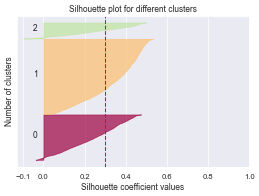

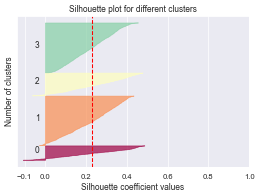

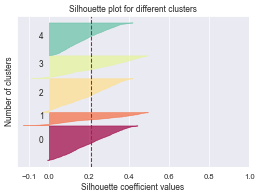

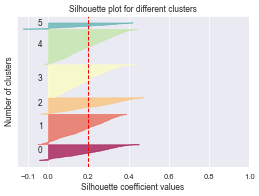

In [59]:
%%time
k_means_report(pd.DataFrame(rp_features))

CPU times: user 4.42 s, sys: 726 ms, total: 5.15 s
Wall time: 2.43 s


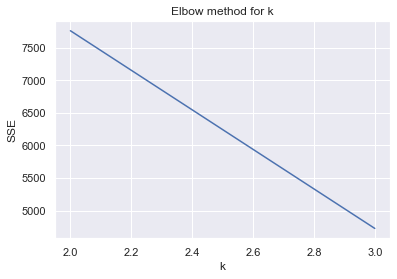

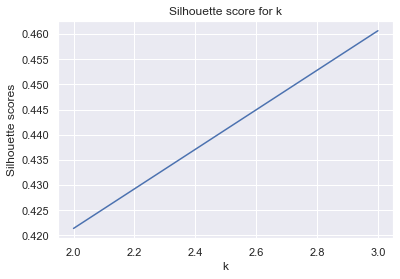

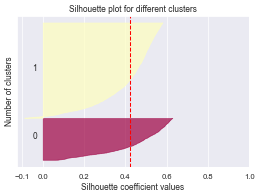

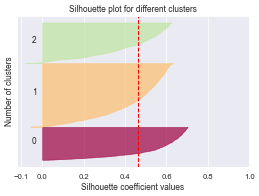

In [60]:
%%time
k_means_report(pd.DataFrame(selector_features))

## Expectation Maximization

In [61]:
def em_report(X_train):
    n_components_values = range(2, len(X_train.columns)+1)
    bic_values = []
    aic_values = []
    silhouettes = []

    for n_components in n_components_values:
        gmm = GaussianMixture(n_components=n_components, 
                              random_state=random_state)
        gmm.fit(X_train)
        bic_values.append(gmm.bic(X_train))
        aic_values.append(gmm.aic(X_train))
        silhouettes.append(silhouette_score(X_train, gmm.predict(X_train), random_state=random_state))

    make_plot(x_values=n_components_values, 
              y_values=silhouettes, 
              x_label='number of components', 
              y_label='Silhouette scores',
              title='Silhouette score method for EM')

    make_plot(x_values=n_components_values, 
              y_values=bic_values, 
              x_label='number of components', 
              y_label='BIC',
              title='BIC scores by number of components')

    make_plot(x_values=n_components_values, 
              y_values=aic_values, 
              x_label='number of components', 
              y_label='AIC',
              title='AIC scores by number of components')

    print('BIC min:', bic_values.index(min(bic_values))+2)
    print('AIC min:', aic_values.index(min(aic_values))+2)
    print('All features total## K-means clustering:', len(X_train.columns))

BIC min: 3
AIC min: 3
All features total## K-means clustering: 3
CPU times: user 1.66 s, sys: 267 ms, total: 1.93 s
Wall time: 991 ms


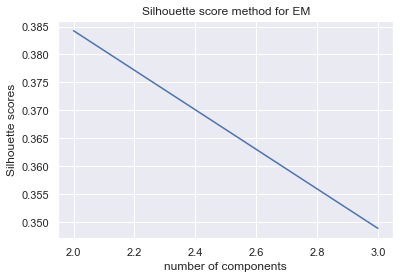

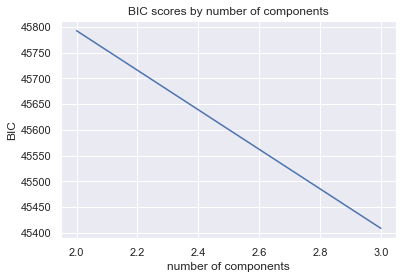

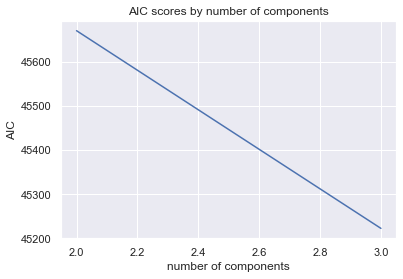

In [62]:
%%time
em_report(pd.DataFrame(pca_features))

BIC min: 5
AIC min: 5
All features total## K-means clustering: 5
CPU times: user 3.57 s, sys: 552 ms, total: 4.12 s
Wall time: 1.81 s


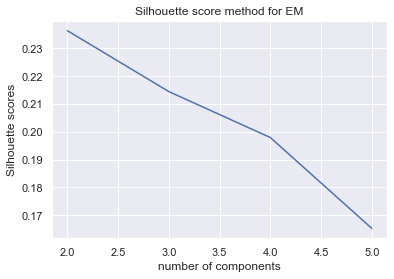

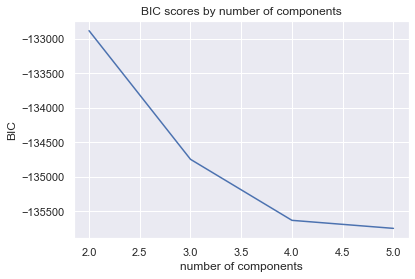

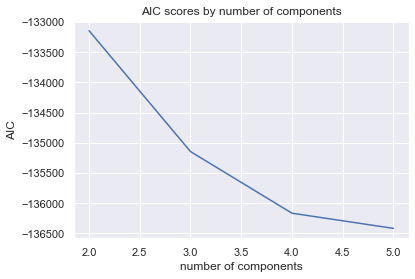

In [63]:
%%time
em_report(pd.DataFrame(ica_features))

BIC min: 6
AIC min: 6
All features total## K-means clustering: 6
CPU times: user 4.45 s, sys: 669 ms, total: 5.12 s
Wall time: 2.37 s


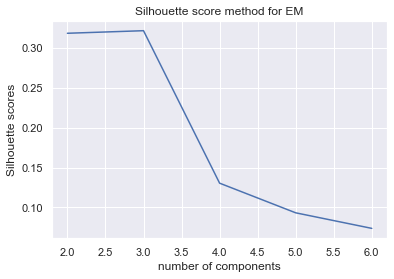

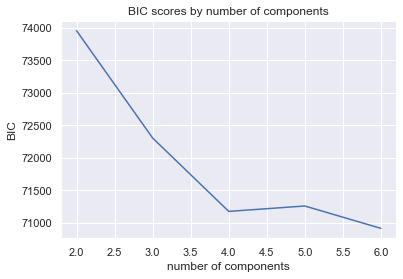

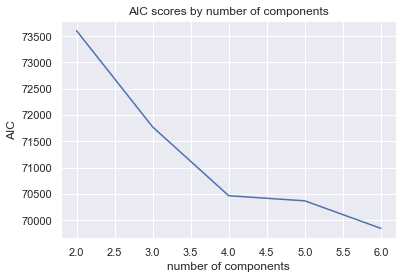

In [64]:
%%time
em_report(pd.DataFrame(rp_features))

BIC min: 3
AIC min: 3
All features total## K-means clustering: 3
CPU times: user 1.83 s, sys: 287 ms, total: 2.11 s
Wall time: 809 ms


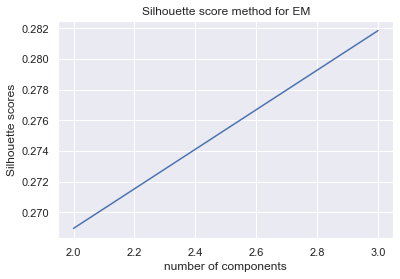

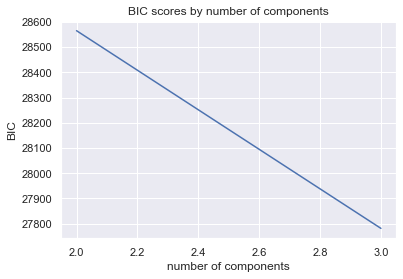

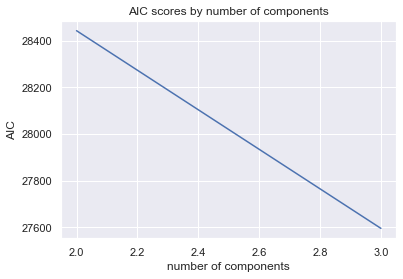

In [65]:
%%time
em_report(pd.DataFrame(selector_features))

# Part 4: Neural Network on Adjusted Data Space

In [66]:
clf = MLPClassifier(random_state=2020, 
                    hidden_layer_sizes=12,
                    max_iter=100)

In [67]:
%%time
for dim_red_features, dim_method_name in zip([pca_features, ica_features, rp_features, selector_features],
                                             ['PCA', 'ICA', 'RP', 'sklearn Selector']):
    search_parameters = {'alpha':np.linspace(0.1, 0.7, 10),
                         'learning_rate_init':np.linspace(0, 0.095, 10),
                         'max_iter':list(range(8,16))
                        }
    gs_clf = GridSearchCV(clf, search_parameters, cv=5, scoring='accuracy', n_jobs=-1)
    gs_clf.fit(dim_red_features, y_train)
    print("Best parameters for {}:".format(dim_method_name), gs_clf.best_params_)

Best parameters for PCA: {'alpha': 0.5666666666666667, 'learning_rate_init': 0.03166666666666667, 'max_iter': 11}
Best parameters for ICA: {'alpha': 0.1, 'learning_rate_init': 0.06333333333333334, 'max_iter': 11}
Best parameters for RP: {'alpha': 0.16666666666666669, 'learning_rate_init': 0.07388888888888889, 'max_iter': 14}
Best parameters for sklearn Selector: {'alpha': 0.30000000000000004, 'learning_rate_init': 0.05277777777777778, 'max_iter': 9}
CPU times: user 19 s, sys: 1.91 s, total: 20.9 s
Wall time: 10min 16s


In [68]:
pca_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                        random_state=random_state, 
                        max_iter=11,
                        alpha=0.5666666666666667,
                        activation='logistic',
                        learning_rate_init=0.03166666666666667
                       )

ica_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                        random_state=random_state, 
                        max_iter=11,
                        alpha=0.1,
                        activation='logistic',
                        learning_rate_init=0.06333333333333334
                       )

rp_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                       random_state=random_state, 
                       max_iter=14,
                       alpha=0.16666666666666669,
                       activation='logistic',
                       learning_rate_init=0.07388888888888889
                      )

selector_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                             random_state=2020, 
                             max_iter=9,
                             alpha=0.30000000000000004,
                             activation='logistic',
                             learning_rate_init=0.05277777777777778
                            )

In [69]:
%%time
pca_clf.fit(pca_features, y_train)

CPU times: user 103 ms, sys: 1.75 ms, total: 105 ms
Wall time: 125 ms


MLPClassifier(activation='logistic', alpha=0.5666666666666667,
              hidden_layer_sizes=(12,), learning_rate_init=0.03166666666666667,
              max_iter=11, random_state=2020)

In [70]:
%%time
y_predicted = pca_clf.predict(pca.fit_transform(X_test))

CPU times: user 8.44 ms, sys: 1.5 ms, total: 9.94 ms
Wall time: 7.35 ms


              precision    recall  f1-score   support

           0     0.0036    0.0041    0.0038       491
           1     0.6490    0.6196    0.6339      1459

    accuracy                         0.4646      1950
   macro avg     0.3263    0.3118    0.3189      1950
weighted avg     0.4865    0.4646    0.4753      1950

CPU times: user 92.5 ms, sys: 3.3 ms, total: 95.8 ms
Wall time: 70.8 ms


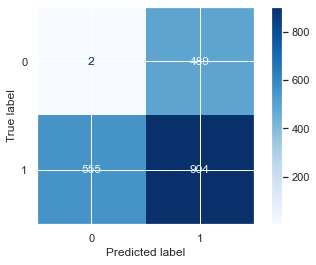

In [71]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(pca_clf, pca.fit_transform(X_test), y_test, 
                      cmap=plt.cm.Blues, display_labels=[0,1]);

In [72]:
%%time
ica_clf.fit(ica_features, y_train)

CPU times: user 93.2 ms, sys: 1.68 ms, total: 94.9 ms
Wall time: 104 ms


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(12,),
              learning_rate_init=0.06333333333333334, max_iter=11,
              random_state=2020)

In [73]:
%%time
y_predicted = ica_clf.predict(ica.fit_transform(X_test))

CPU times: user 12.6 ms, sys: 1.29 ms, total: 13.9 ms
Wall time: 8.39 ms


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       491
           1     0.7482    1.0000    0.8560      1459

    accuracy                         0.7482      1950
   macro avg     0.3741    0.5000    0.4280      1950
weighted avg     0.5598    0.7482    0.6404      1950

CPU times: user 103 ms, sys: 2.13 ms, total: 105 ms
Wall time: 98.4 ms


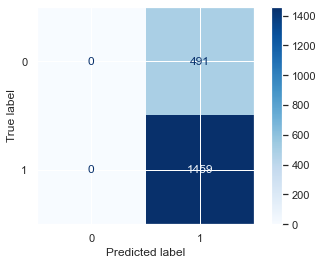

In [74]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(ica_clf, ica.fit_transform(X_test), y_test, 
                      cmap=plt.cm.Blues, display_labels=[0,1]);

In [75]:
%%time
rp_clf.fit(rp_features, y_train)

CPU times: user 117 ms, sys: 1.78 ms, total: 118 ms
Wall time: 120 ms


MLPClassifier(activation='logistic', alpha=0.16666666666666669,
              hidden_layer_sizes=(12,), learning_rate_init=0.07388888888888889,
              max_iter=14, random_state=2020)

In [76]:
%%time
y_predicted = rp_clf.predict(rp.fit_transform(X_test))

CPU times: user 5.3 ms, sys: 669 µs, total: 5.97 ms
Wall time: 5.2 ms


              precision    recall  f1-score   support

           0     0.9333    0.9124    0.9228       491
           1     0.9707    0.9781    0.9744      1459

    accuracy                         0.9615      1950
   macro avg     0.9520    0.9452    0.9486      1950
weighted avg     0.9613    0.9615    0.9614      1950

CPU times: user 99.4 ms, sys: 1.32 ms, total: 101 ms
Wall time: 67.2 ms


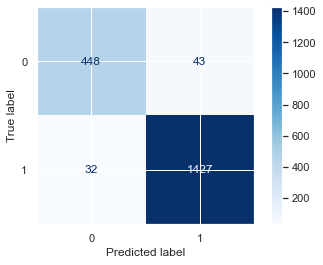

In [77]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(rp_clf, rp.fit_transform(X_test), y_test, 
                      cmap=plt.cm.Blues, display_labels=[0,1]);

In [78]:
%%time
selector_clf.fit(selector_features, y_train)

CPU times: user 86.3 ms, sys: 1.97 ms, total: 88.2 ms
Wall time: 92.5 ms


MLPClassifier(activation='logistic', alpha=0.30000000000000004,
              hidden_layer_sizes=(12,), learning_rate_init=0.05277777777777778,
              max_iter=9, random_state=2020)

In [79]:
%%time
y_predicted = selector_clf.predict(selector.transform(X_test))

CPU times: user 2.67 ms, sys: 782 µs, total: 3.46 ms
Wall time: 3.07 ms


              precision    recall  f1-score   support

           0     0.9607    0.9470    0.9538       491
           1     0.9823    0.9870    0.9846      1459

    accuracy                         0.9769      1950
   macro avg     0.9715    0.9670    0.9692      1950
weighted avg     0.9768    0.9769    0.9769      1950

CPU times: user 87.3 ms, sys: 1.78 ms, total: 89 ms
Wall time: 63.4 ms


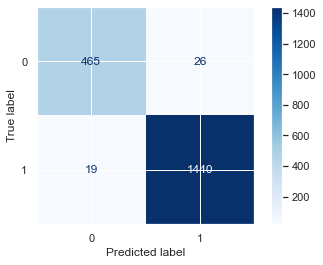

In [80]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(selector_clf, selector.transform(X_test), y_test, 
                          cmap=plt.cm.Blues, display_labels=[0,1]);

# Part 5: Neural Network on Clustered Data

In [81]:
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X_train)
labels = kmeans.labels_

In [82]:
kmeans_train = pd.DataFrame(labels)

In [83]:
gmm = GaussianMixture(n_components=6, 
                      random_state=random_state)
gmm.fit(X_train)
labels = gmm.predict(X_train)

In [84]:
em_train = pd.DataFrame(labels)

In [85]:
encoder = OneHotEncoder(handle_unknown='ignore')
em_train = pd.DataFrame(encoder.fit_transform(em_train).toarray())

In [86]:
clf = MLPClassifier(random_state=random_state, 
                    hidden_layer_sizes=12,
                    max_iter=100)

In [87]:
%%time
search_parameters = {'alpha':np.linspace(0.1, 0.7, 10),
                     'learning_rate_init':np.linspace(0, 0.095, 10),
                     'max_iter':list(range(4,16))
                    }
gs_clf = GridSearchCV(clf, search_parameters, cv=5, scoring='accuracy', n_jobs=-1)
gs_clf.fit(kmeans_train, y_train)
print("Best parameters for k-means:", gs_clf.best_params_)

Best parameters for k-means: {'alpha': 0.1, 'learning_rate_init': 0.010555555555555556, 'max_iter': 4}
CPU times: user 6.47 s, sys: 633 ms, total: 7.1 s
Wall time: 3min 22s


In [88]:
%%time
search_parameters = {'alpha':np.linspace(0.1, 0.7, 10),
                     'learning_rate_init':np.linspace(0, 0.095, 10),
                     'max_iter':list(range(4,16))
                    }
gs_clf = GridSearchCV(clf, search_parameters, cv=5, scoring='accuracy', n_jobs=-1)
gs_clf.fit(em_train, y_train)
print("Best parameters for expectation maximization:", gs_clf.best_params_)

Best parameters for expectation maximization: {'alpha': 0.1, 'learning_rate_init': 0.010555555555555556, 'max_iter': 4}
CPU times: user 6.66 s, sys: 642 ms, total: 7.3 s
Wall time: 3min 20s


In [89]:
kmeans_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                           random_state=random_state, 
                           max_iter=4,
                           alpha=0.1,
                           activation='logistic',
                           learning_rate_init=0.010555555555555556
                          )

em_clf = MLPClassifier(hidden_layer_sizes=(12,), 
                       random_state=random_state, 
                       max_iter=4,
                       alpha=0.1,
                       activation='logistic',
                       learning_rate_init=0.010555555555555556
                      )

In [90]:
%%time
kmeans_clf.fit(kmeans_train, y_train)

CPU times: user 36.8 ms, sys: 1.54 ms, total: 38.3 ms
Wall time: 38 ms


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(12,),
              learning_rate_init=0.010555555555555556, max_iter=4,
              random_state=2020)

In [91]:
%%time
kmeans.fit(X_test)
test_labels = pd.DataFrame(kmeans.labels_)

CPU times: user 166 ms, sys: 19.5 ms, total: 186 ms
Wall time: 57.4 ms


In [92]:
%%time
y_predicted = kmeans_clf.predict(test_labels)

CPU times: user 5.12 ms, sys: 1.33 ms, total: 6.45 ms
Wall time: 4.86 ms


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       491
           1     0.7482    1.0000    0.8560      1459

    accuracy                         0.7482      1950
   macro avg     0.3741    0.5000    0.4280      1950
weighted avg     0.5598    0.7482    0.6404      1950

CPU times: user 135 ms, sys: 10.4 ms, total: 146 ms
Wall time: 77.2 ms


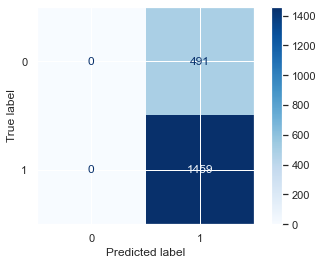

In [93]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(kmeans_clf, test_labels, y_test, 
                      cmap=plt.cm.Blues, display_labels=[0,1]);

In [94]:
%%time
em_clf.fit(em_train, y_train)

CPU times: user 39 ms, sys: 1.18 ms, total: 40.2 ms
Wall time: 40.9 ms


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(12,),
              learning_rate_init=0.010555555555555556, max_iter=4,
              random_state=2020)

In [95]:
%%time
gmm = GaussianMixture(n_components=6, 
                      random_state=random_state)
gmm.fit(X_test)
labels = gmm.predict(X_test)
em_test = pd.DataFrame(labels)
em_test = pd.DataFrame(encoder.fit_transform(em_test).toarray())

CPU times: user 630 ms, sys: 50.9 ms, total: 681 ms
Wall time: 215 ms


In [96]:
%%time
y_predicted = em_clf.predict(em_test)

CPU times: user 3.86 ms, sys: 759 µs, total: 4.62 ms
Wall time: 3.35 ms


              precision    recall  f1-score   support

           0     0.0039    0.0081    0.0053       491
           1     0.4735    0.3002    0.3674      1459

    accuracy                         0.2267      1950
   macro avg     0.2387    0.1542    0.1864      1950
weighted avg     0.3553    0.2267    0.2763      1950

CPU times: user 87 ms, sys: 1.92 ms, total: 88.9 ms
Wall time: 50.7 ms


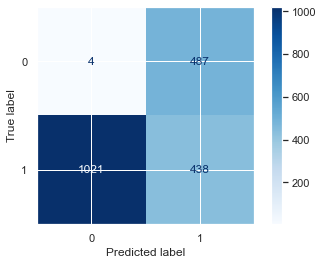

In [97]:
%%time
print(classification_report(y_test, y_predicted, digits=4))
plot_confusion_matrix(em_clf, em_test, y_test, 
                      cmap=plt.cm.Blues, display_labels=[0,1]);